# Perfil de temperatura en paredes residenciales con material de cambio de fase
### Grupo 1 - IIQ2003

El proyecto permite caracterizar el perfil de temperatura en paredes residenciales en Santiago de Chile, el cual está gobernado por conducción de calor a través de su espesor. Se centra en un geopolímero de concreto (GPC) con material microencapsulado de cambio de fase (MPCM). A partir de ello, busca evaluar su efectividad en el aislamiento térmico considerando las variaciones en la capacidad calorífica del material con la temperatura.

Para modelar el sistema, se consideran 5 supuestos relevantes. En primer lugar, la transferencia de calor a través de la pared es unidimensional en el eje x. Además, no hay ninguna fuente de generación de energía dentro de la pared. A la vez, el aislante dentro de la pared está distribuido de forma homogénea y es isotrópico. Por otro lado, la densidad y conductividad térmica del material son constantes. Finalmente, se puede despreciar la convección forzada, asumiendo que la velocidad del viento es suficientemente baja. Luego, se puede modelar el problema mediante la ecuación de conservación de energía:

$$\rho c_p \left( \frac{\partial T}{\partial t} + v_x \frac{\partial T}{\partial x} + v_y \frac{\partial T}{\partial y} + v_z \frac{\partial T}{\partial z} \right) = k \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} \right) + \mu\phi_v$$

Se consideró que las velocidades en todos los ejes son 0, ya que se está modelando un sólido. Además, solo nos interesa el transporte transiente en la dirección x. Por lo tanto, el sistema se simplifica a a siguiente ecuación:

$$
\rho c_p \frac{\partial T}{\partial t}
= k \frac{\partial^2 T}{\partial x^2}
$$

Considerando que la capacidad calorífica varía con la temperatura, se puede modelar mediante las siguientes ecuaciones, considerando que su temperatura de fusión (Tm) es igual a 23,7°C:

$$
C_p(T) =
\begin{cases}
C_{p0}+h\cdot \dfrac{w_l^{2 m_l}}
{w_l^2+(2^{\frac{1}{m_l}}-1)\cdot (2T-2T_m)^2}, & T \le T_m \\
C_{p0}+h\cdot \dfrac{w_r^{2 m_r}}
{w_r^2+(2^{\frac{1}{m_r}}-1)\cdot (2T-2T_m)^2}, & T > T_m
\end{cases}
$$

Además, se planteó 1 condición inicial y 2 condiciones de borde. La condición inicial considera que la temperatura en el tiempo 0 es conocida. La primera condición de borde considera la transferencia de calor por convección hacia el interior de la vivienda, asumiendo que esta mantiene una temperatura constante de 21°C. La segunda condición de borde incluye la transferencia de calor por convección hacia el exterior de la vivienda, así como por radiación. Para este caso, se considera que tanto la temperatura exterior como radiación solar varían de forma senoidal a lo largo del día:

$$
\text{1) Condición inicial: } \quad T(x, t=0) = T_0
$$

$$
\text{2) Condición borde 1:} \quad
-k \frac{\partial T(x=0)}{\partial x} = h_1 \left( T_\infty^{\text{interior}} - T(x=0) \right)
$$

$$
\text{3) Condición borde 2:} \quad
-k \frac{\partial T(x=\delta)}{\partial x}= h_2 \left( T(x=\delta) - T_\infty^{\text{exterior}}(t) \right)- \alpha q''_{solar}(t)
$$

donde $T_\infty^{\text{exterior}(t)}$ y $q''_{solar}(t)$ son funciones senoidales en función del tiempo:

$$
T_\infty^{\text{exterior}}(t)= \frac{T_{\max} + T_{\min}}{2}+ \frac{T_{\max} - T_{\min}}{2}\sin\left( \frac{\pi}{43200} t - \frac{2\pi}{3} \right)
$$

$$
q''_{solar}(t) = 
\begin{cases}
0, & 21{:}00 \le t \le 5{:}00 \\
q_{s,\max} \, \sin\left( \frac{\pi}{57600}\, t - \frac{5\pi}{16} \right),
& 5{:}00 < t < 21{:}00
\end{cases}
$$

Luego, se puede discretizar la ecuación diferencial y las condiciones de borde. Para la ecuación diferencial, se considera una aproximación hacia adelante de primer orden para la derivada temporal, y una aproximación central de segundo orden para la derivada espacial. Para la condición inicial, se reemplaza en el nodo de tiempo 0. Para la condición de borde 1, se usa una aproximación hacia adelante de segundo orden. Para la condición de borde 2, se usa una aproximación hacia atrás de segundo orden. A continuación, se muestra la forma en que se despeja la discretización de la ecuación diferencial.

$$
\rho c_p \frac{T_i^{j+1} - T_i^{j}}{\Delta t}=k\frac{T_{i+1}^{j} - 2T_i^{j} + T_{i-1}^{j}}{\Delta x^2}
$$

$$
\frac{\rho c_pT_i^{j+1}}{\Delta t} = \frac{\rho\ c_pT_i^{j}}{\Delta t}+k\frac{T_{i+1}^{j} - 2T_i^{j} + T_{i-1}^{j}}{\Delta x^2}
$$

$$
T_i^{j+1} = T_i^{j} + \Delta t \frac{k}{\rho c_p\Delta x^2} (\{T_{i+1}^{j} - 2T_i^{j} + T_{i-1}^{j} \}) 
$$

Luego, las condición inicial queda:

$$
\quad T_i^{j=0} = T_0
$$

La condición de borde 1 se simplifica:

$$
k \cdot \frac{3T_i^j - 4T_{i+1}^{j} + T_{i+2}^{j}}{2\Delta x} = h_1 \left( T_\infty^{\text{interior}} - T_i^j \right)
$$

$$
T_i^j = \frac{k}{3k + 2h_1\Delta x} \left( 4T_{i+1}^{j} - T_{i+2}^{j} \right) + \frac{h_1 \cdot T_\infty^{\text{interior}} 2\Delta x}{3k + 2h_1\Delta x}
$$

Finalmente, la condición de borde 2 se simplifica:

$$
k \cdot \frac{-3T_i^j + 4T_{i-1}^{j} - T_{i-2}^{j}}{2\Delta x} = h_2 \left( T_i^j - T_\infty^{\text{exterior}} \right) -\alpha q_{solar}
$$

$$
T_i^j = \frac{1}{-\frac{3}{2\Delta x}-h_2}\left(\frac{k}{2\Delta x} \left(- 4T_{i-1}^{j} + T_{i-2}^{j} \right) - h_2 T_\infty^{\text{exterior}} -\alpha q_{solar}\right)
$$


1. Importar módulos

El primer paso consiste en importar los módulos que nos servirán para resolver el problema computacional. En específico, necesitamos 3 módulos:
- numpy: permite realizar operaciones matemáticas y construir vectores y matrices multidimensionales.
- matplotlib.pyplot: permite realizar gráficos.
- cm: es una paleta de colores inclusiva que facilita la visualización de los gráficos.


In [42]:
# Cálculos numéricos
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import cm

2. Definir datos

Antes de implementar el modelo computacional, se deben definir todos los datos que se usarán a lo largo del problema. Al escribirlos en un inicio, se mantiene un orden que permite comprender de forma secuencial el modelo. Primero, se definió la densidad y espesor de la pared, considerando una concentración de 5,2% de MPCM. A la vez, se consideró un espesor promedio de 0.15 m, que es la norma establecida para la construcción de paredes (Gobierno de Chile, 2025).

Luego, se definieron los coeficientes de transferencia de calor por convección natural, para lo cual se usan los datos entregados por el estudio realizado por Cao et al. (2018). Además, se define un valor promedio para la conductividad térmica, también obtenido del estudio realizado por Cao et al. (2018). Esta aproximación se justifica porque la conductividad térmica se mantiene constante en el rango en que varía la temperatura. No se puede asumir lo mismo para la capacidad calorífica, ya que este parámetro evidencia el cambio de fase del material. Sin embargo, se usará un valor promedio de capacidad calorífica para definir un valor de difusividad térmica aproximado. Este solo se usará para definir el paso del espaciamiento temporal.

Para definir la temperatura en el interior de la vivienda, se consideró un valor constante de 21°C. Luego, para definir la temperatura inicial, mínima y máxima de medición, se usaron los datos promedio medidos durante el mes de enero entregados por el Ministerio de Energía (2025). Finalmente, se obtuvo que la temperatura de fusión del material es 23,7°C (Cao et. al, 2018).

También, se usó un estudio enfocado en el geopolímero de concreto con material de cambio de fase microencapsulado para definir su absorbancia (Cao et al., 2019). Para definir la radiación solar máxima, se usaron los datos promedio medidos durante el mes de enero entregados por el Ministerio de Energía (2025).

Finalmente, se definieron los parámetros que se deben reemplazar en la ecuación que define el valor de la capacidad calorífica en función de la temperatura. Nuevamente, se usaron los datos experimentales de un estudio enfocado en el geopolímero de concreto con material de cambio de fase microencapsulado  (Cao et al., 2019)

In [43]:
#Propiedades pared
p = 1875 #kg/m^3
espesor = 0.15 #m

#Coeficientes de transferencia de calor y conductividad térmica
h1 = 8 #W/(m^2*K)
h2 = 20 #W/(m^2*K)
k = 2.65 #W/(m*K)
alpha_prom=k/(p*704)

#Temperaturas
Tinf_interior = 21+273.15 #K
T_0 = 21.81313+273.15 #K
T_max = 29.59844+273.15 #K
T_min = 15.44091+273.15 #K
T_m=23.7+273.15 #K

#Radiación
a = 0.65
qs_max = 1013.066 #W/m^2

#Parámetros capacidad calorífica
wl=6.27
ml=1.44
wr=2.91
mr=5.25
h=851
cp0=1125

Luego, se debe graficar la radiación solar en función del tiempo para verificar que la función modele de forma correcta la variación temporal a lo largo del día. Se usará la siguiente ecuación:

$$
q''_{solar}(t) = 
\begin{cases}
0, & 21{:}00 \le t \le 5{:}00 \\
q_{s,\max} \, \sin\left( \frac{\pi}{57600}\, t - \frac{5\pi}{16} \right),
& 5{:}00 < t < 21{:}00
\end{cases}
$$

Para realizar el gráfico, se considerará un intervalo de tiempo entre 0 y 24 horas. Luego, se usará el comando plt.plot() para realizar el gráfico.


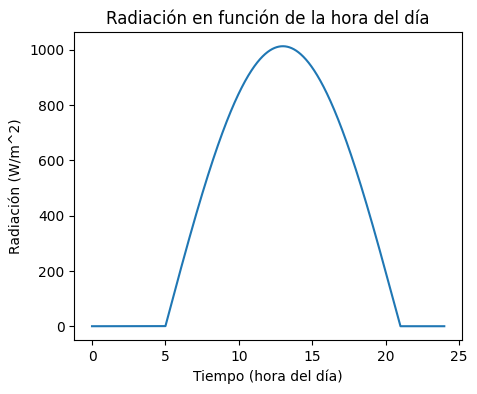

In [44]:
tiempo=np.linspace(0,24*3600,24*3600)
q_solar=qs_max*np.sin(np.pi/57600*tiempo-5*np.pi/16)
q_solar[q_solar < 0] = 0

fig, ax = plt.subplots(1, 1, figsize=[5,4])
plt.plot(tiempo/3600,q_solar)
ax.set_title("Radiación en función de la hora del día")
ax.set_xlabel("Tiempo (hora del día)")
ax.set_ylabel("Radiación (W/m^2)")
plt.show()

De la misma forma, se debe graficar la evolución temporal de la temperatura exterior. Se usará la siguiente aproximación:

$$
T_\infty^{\text{exterior}}(t)= \frac{T_{\max} + T_{\min}}{2}+ \frac{T_{\max} - T_{\min}}{2}\sin\left( \frac{\pi}{43200} t - \frac{2\pi}{3} \right)
$$

Se grafica de la misma forma que antes.

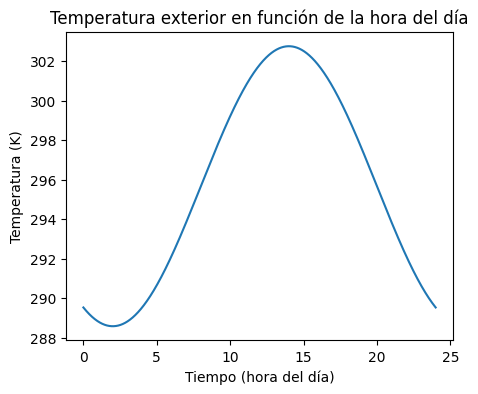

In [45]:
T_out=((T_max+T_min)/2)+((T_max-T_min)/2)*np.sin(np.pi/43200*tiempo-2*np.pi/3)
fig, ax = plt.subplots(1, 1, figsize=[5,4])

plt.plot(tiempo/3600,T_out)
ax.set_title("Temperatura exterior en función de la hora del día")
ax.set_xlabel("Tiempo (hora del día)")
ax.set_ylabel("Temperatura (K)")
plt.show()

3. Definir los parámetros de grilla y computacionales. 

A continuación, se debe definir una serie de puntos en el espacio y en el tiempo, los que reciben el nombre de nodos. En específico, crearemos 200 nodos en el espacio y 200 nodos en el tiempo. Luego, al momento de discretizar la ecuación diferencial, se evalúa la iteración en cada nodo. También definiremos el dominio discretizado como un arreglo de varios puntos espaciales y temporales, a partir de lo cual se definirá el espaciamiento. Para el espaciamiento en x, simplemente se divide el espesor por el número de nodos (se le resta 1 por aproximación). Para el caso del espaciamiento en t, se define un número de Fourier aceptable (0.45) y se calcula el valor de $\delta t$ para el cual el método FTCS es estable. Para ello, se usa la siguiente ecuación:

$$
\Delta t \leq \frac{Fo \cdot \Delta x^2}{2 \alpha}
$$

In [46]:
# Número de nodos
n = 200
t_max=3600*24

# Crear un dominio discretizado
x = np.linspace(0,espesor,n)
t = np.linspace(0,t_max,n)

# Espaciamiento o paso radial
dx = espesor/(n-1)

# Paso de tiempo: Se considera Fo=0.45
dt = 0.45*dx**2/(2*alpha_prom)

4. Definir parámetros FTCS

A continuación, se deben definir los parámetros que se van a usar en las iteraciones del método FTCS. Se define tiempo inicial y final de integración, considerando que se busca medir el perfil de temperatura durante las 24 horas del día. Además, se considerará un intervalo de tiempo de 1 segundo para guardar los resultados. Por otro lado, se define una lista inicialmente vacía para guardar los tiempos donde se graban los perfiles de temperatura. De forma similar, se definen listas vacías para guardar los valores de capacidad calorífica y los perfiles de temperatura en función del tiempo. A la vez, se inicializa el vector de temperatuas con $T_0$, de modo de incluir la condición inicial del problema. Finalmente, se copia la temperatura en otra variable, la cual servirá para ir actualizando el método FTCS.

In [47]:
# Tiempo inicial de integración
t = 0

# Tiempo final de integración
t_final = 3600*24

# Grabar resultados
write_interval = 1

# Lista en que se acumulan los tiempos donde se graban los perfiles de temperatura
t_vec = []

# Lista con los valores de co
cp_list=[]
        
# Lista con los perfiles de temperatura
T_num = []
    
# Inicializar vector con temperatura inicial (condición inicial)
T=np.ones(n) * T_0

#Inicializar vector del lado derecho (b)
#no se considera en los cálculos debido a que es un vector de 0
    
# Copiar la temperatura T en otra variable
T_old = np.copy(T) #Actualizar método FTCS

5. Implementar algoritmo FTCS acoplado al método de punto fijo

Se inicia el esquema FTCS para cada instante de tiempo t. Dado que la capacidad calorífica ($c_p$) varía con la temperatura, se implementa el método de punto fijo para construir una matriz A que también dependa de la temperatura. 

Luego, para cada instante de tiempo se define una temperatura intermedia (T_int). A partir de esta, se calcula la matriz A que contiene los coeficientes del método FTCS. Después, se calcula una nueva temperatura.Este procedimiento se repite hasta que el método converge, es decir, ambas temperaturas son iguales. 

Una vez completada la iteración del método de punto fijo, se sigue con la aplicación del algoritmo FTCS. Esto significa que se actualizan los nodos interiores y condiciones de borde. Este procedimiento se repite para todos los instantes de tiempo, para lo cual se crean 4 listas relevantes:
- T_old: guarda la temperatura del tiempo anterior del método FTCS.
- T_new: temperatura final obtenida en el tiempo actual del método FTCS.
- T_int: temperatura intermedia usada dentro del método de punto fijo.
- T_old_i: temperatura intermedia de la iteración anterior del método de punto fijo.

In [48]:
### COMIENZO ITERACIÓN FTCS: itera para cada instante de tiempo
while t < t_final:

    #Definir tolerancia para inicializar método del punto fijo
    tol=1e9

    #Iniciar contador
    contador=0

    #Iniciar lista de temperatura intermedia
    #El objetivo es comparar la temperatura nueva con la intermedia en método del punto fijo
    T_int = np.copy(T_old) 

    ###MÉTODO DE PUNTO FIJO

    #Comenzar ciclo de la iteración: se detendrá cuando la tolerancia sea aceptable
    while tol>1e-3:

        #Paso 1: calcular cp y alpha en cada nodo x (i)
        #Inicializar vector cp
        cp=np.zeros(n)
        #Recorrer todos los nodos x (i)
        for i in range(n):
        #Caso 1: T<=Tm
            if T_int[i] <= T_m:
                cp[i] = cp0 + h*(wl**(2*ml)) / (wl**2 + (2**(1/ml)-1)*(2*T_int[i]-2*T_m)**2)**ml
            #Caso 2: T>Tm
            else:
                cp[i] = cp0 + h*(wr**(2*mr)) / (wr**2 + (2**(1/mr)-1)*(2*T_int[i]-2*T_m)**2)**mr
        
        #Definir difusividad térmica (alpha) dado los valores de cp calculados
        alpha=k/(p*cp)
    
        #Paso 2: Construir matriz A
        #Inicializar matriz A
        A=np.zeros((n,n))
        #Iteración en nodos interiores
        for i in range(1,n-1):
            # Coeficiente que acompaña a T_{i-1}^j
            A[i,i-1] = alpha[i]/dx**2
            # Coeficiente que acompaña a T_{i}^j
            A[i,i] = -2*alpha[i]/dx**2
            # Coeficiente que acompaña a T_{i+1}^j
            A[i,i+1] = alpha[i]/dx**2
        
        #Paso 3: Calcular tolerancia

        #Calcular temperatura intermedia entre una y otra iteración
        T_int = T_old + (np.dot(A,T_old))*dt   

        #Definir una nueva temperatura solo para la iteración interna
        T_old_i=np.copy(T_int)

        #Calcular tolerancia
        if contador==0:
            tol=np.linalg.norm(T_int - T_old)/n
        else:
            tol=np.linalg.norm(T_int - T_old_i)

        contador+=1

    ###MÉTODO FTCS

    #Paso 4: Resolver FTCS
    # Actualizar nodos interiores
    T_new = T_int + (np.dot(A,T_int))*dt   
        
    # Actualizar condiciones de borde
    #Convección interior
    T_new[0] = k/(3*k+2*h1*dx)*(4*T_new[1]-T_new[2])+h1*Tinf_interior*2*dx/(3*k+h1*2*dx)
    #Convección exterior + radiación
    q_solar=qs_max*np.sin(np.pi/57600*t-5*np.pi/16)
    if q_solar<0:
        T_new[-1] = ( k/(2*dx)*(-4*T_new[-2]+T_new[-3])
        - h2*((T_max+T_min)/2)+((T_max-T_min)/2)*np.sin(np.pi/43200*t-2*np.pi/3)) / (-3*k/(2*dx)-h2)
    else:
        T_new[-1] = ( k/(2*dx)*(-4*T_new[-2]+T_new[-3])
        - h2*((T_max+T_min)/2)+((T_max-T_min)/2)*np.sin(np.pi/43200*t-2*np.pi/3)
        - a*q_solar ) / (-3*k/(2*dx)-h2)

    # Crear una copia de la nueva temperatura
    T_old = np.copy(T_new) 

    # Actualizar tiempo
    t += dt   

    # Definir un control de flujo para guardar el tiempo, temperatura y capacidad calorífica.
    if (t%write_interval) < dt:      
                    
        # Guardamos el perfil de temperatura
        T_num.append(T_new)
            
        # Guardamos el tiempo
        t_vec.append(t)

        #Guardar cp
        cp_list.append(cp)

6. Análisis de resultados

Primero, se grafica la temperatura en función de la distancia en x a distintos instantes de tiempo.

/var/folders/l0/trjl5vrs6qd3x2t9z0zf5f5m0000gn/T/ipykernel_26889/2344873407.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("cividis", len(range(0, len(t_vec), salto)))


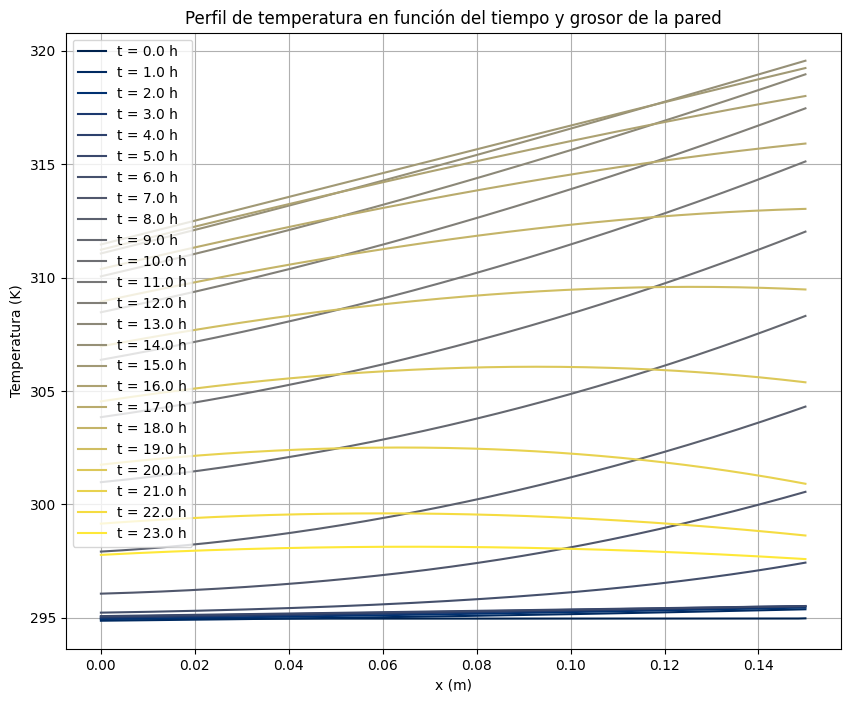

In [49]:
fig, ax = plt.subplots(1, 1, figsize=[10,8])

# Definir espaciamiento entre perfiles de temperatura a graficar
salto = 3600

#Definir paleta de colores
cmap = cm.get_cmap("cividis", len(range(0, len(t_vec), salto)))
color_i=0

# Realizar iteración para graficar
for i in range(0, len(t_vec), salto):

    # Redefir variable x
    x_plot = x

    # Graficar
    plt.plot(x_plot, T_num[i], label=f"t = {t_vec[i]/3600:.1f} h", color=cmap(color_i))
    plt.legend(fontsize=12)
    color_i+=1

ax.set_title("Perfil de temperatura en función del tiempo y grosor de la pared")
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperatura (K)")
ax.grid()
ax.legend()
plt.show()

Para comprender mejor la variación de temperatura, se realiza un gráfico de contorno.

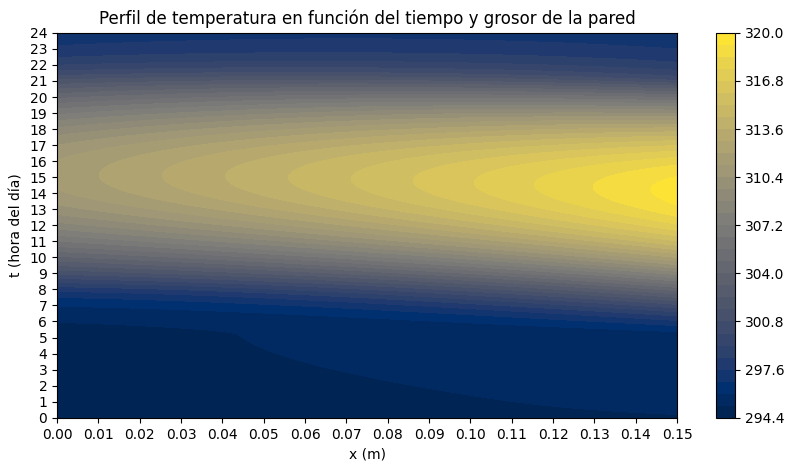

In [50]:
cm = 'cividis'
X, T = np.meshgrid(x, t_vec)
T_array = np.array(T_num)
fig, ax = plt.subplots(1,1,figsize=[10, 5])

cpf = ax.contourf(X, T/3600, T_array, cmap=cm, levels=30)
fig.colorbar(cpf, ax=ax)
ax.set_title("Perfil de temperatura en función del tiempo y grosor de la pared")
ax.set_xlabel("x (m)")
ax.set_ylabel("t (hora del día)")
ax.set_xticks(np.arange(0, 0.16, 0.01))
ax.set_yticks(np.arange(0, 25, 1))
plt.show()



Finalmente, se realiza otro gráfico de contorno para analizar que la capacidad calorífica efectivamente varía conforme la temperatura.

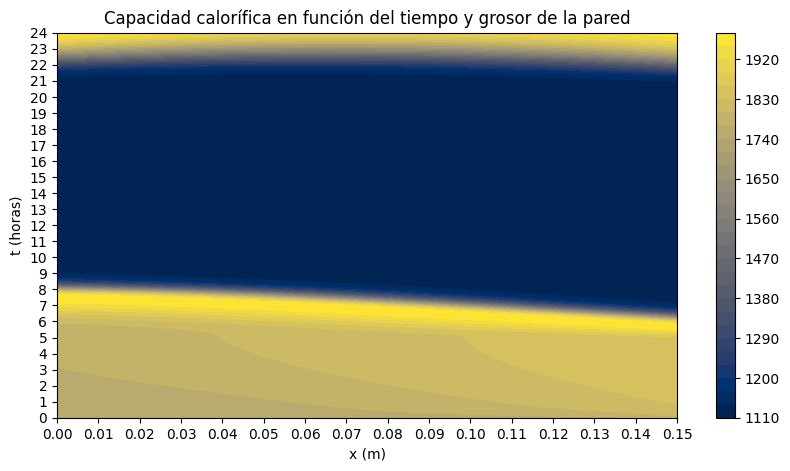

In [51]:
X, T = np.meshgrid(x, t_vec)
cp_array = np.array(cp_list)
fig, ax = plt.subplots(1,1,figsize=[10, 5])

cpf = ax.contourf(X, T/3600, cp_array, cmap=cm, levels=30)
fig.colorbar(cpf, ax=ax)

ax.set_title("Capacidad calorífica en función del tiempo y grosor de la pared")
ax.set_xlabel("x (m)")
ax.set_ylabel("t (horas)")
ax.set_xticks(np.arange(0, 0.16, 0.01))
ax.set_yticks(np.arange(0, 25, 1))

plt.show()